<a href="https://colab.research.google.com/github/Maxzeno/machine-learning/blob/main/Custom_linear_regression_model_with_add_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [446]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [447]:
class CustomPolynomialRegression:
    def __init__(self, degree=2, learning_rate=0.01, num_iterations=1000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None

    def generate_polynomial_features(self, X):
        m, n = X.shape
        X_poly = np.ones((m, 1))  # Initialize with ones for the bias term

        for d in range(1, self.degree + 1):
            for i in range(n):
                X_poly = np.hstack((X_poly, np.power(X[:, i], d)))

        return X_poly

    def fit(self, X, y):
        X_poly = self.generate_polynomial_features(X)
        m, n = X_poly.shape
        self.theta = np.zeros(n)  # Initialize with zeros

        for _ in range(self.num_iterations):
            predictions = np.dot(X_poly, self.theta)
            error = predictions - y
            gradient = np.dot(X_poly.T, error) / m
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        X_poly = self.generate_polynomial_features(X)
        return np.dot(X_poly, self.theta)

In [448]:
model = LinearRegression()
poly_features = PolynomialFeatures()

In [449]:
# Random data
X = np.arange(1, 101).reshape(-1, 2) 
X = X + X[::-1]
X = X + np.random.randn(X.shape[0]*2).reshape(*X.shape)
y = np.add(X[:, 0], X[:, 1]) * 10

# onedim_x = X.reshape(-1)
# y = (onedim_x + (onedim_x-1))*10
y = y + np.random.randn(X.shape[0]) * 300

In [450]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #, random_state=42)

In [451]:
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
X_train_poly.shape, X_test_poly.shape

((40, 6), (10, 6))

In [452]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [453]:
model.coef_, model.intercept_

(array([    0.        , -7910.50920565,    79.372998  ,     7.9933065 ,
           61.72353855,   -31.21930203]),
 400357.9919195051)

In [454]:
y_hat = model.predict(X_test_poly)

In [455]:
"""
w = model.coef_
w[1] = 18
b = model.intercept_
index = 1
for index in range(2):
 y_hat_feature = w[index]*X_test[:, index] + b

 plt.plot(X_test[:, index], y_hat_feature)
 plt.scatter(X_test[:, index], y_test)
 plt.xlabel("feature")
 plt.ylabel("label")
 plt.show()
"""

'\nw = model.coef_\nw[1] = 18\nb = model.intercept_\nindex = 1\nfor index in range(2):\n y_hat_feature = w[index]*X_test[:, index] + b\n\n plt.plot(X_test[:, index], y_hat_feature)\n plt.scatter(X_test[:, index], y_test)\n plt.xlabel("feature")\n plt.ylabel("label")\n plt.show()\n'

In [456]:
model.score(X_test_poly, y_test)
# model.score(X_train_poly, y_train)

-0.241368265180965

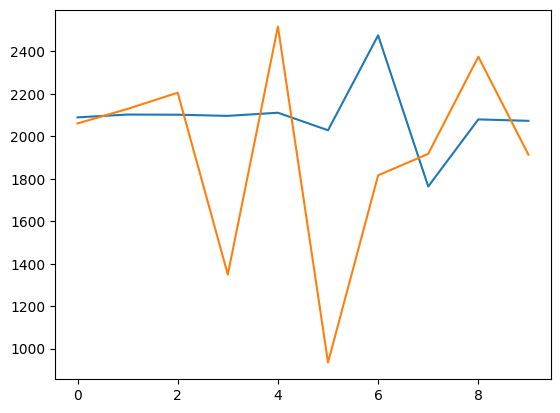

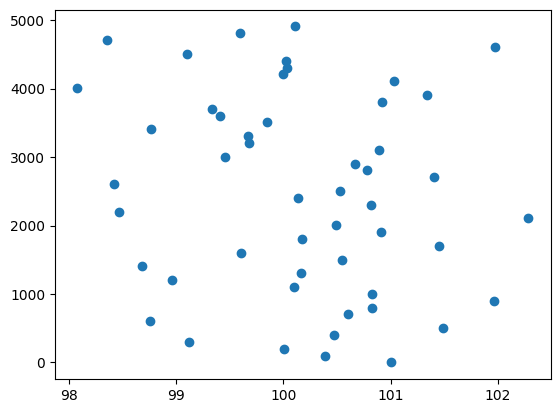

In [466]:
plt.plot(y_hat)
plt.plot(y_test)
plt.show()
plt.scatter(X[:, 0], np.arange(0, X.shape[0]*X[:, 0].mean(), X[:, 0].mean()))
plt.show()

In [458]:
# help(LinearRegression)
X_test_poly, y_test, y_hat

(array([[1.00000000e+00, 9.96737913e+01, 1.02194107e+02, 9.93486468e+03,
         1.01860741e+04, 1.04436355e+04],
        [1.00000000e+00, 1.00781193e+02, 1.02010281e+02, 1.01568489e+04,
         1.02807178e+04, 1.04060974e+04],
        [1.00000000e+00, 1.01968225e+02, 1.02600064e+02, 1.03975190e+04,
         1.04619465e+04, 1.05267732e+04],
        [1.00000000e+00, 1.00528928e+02, 9.92019159e+01, 1.01060653e+04,
         9.97266224e+03, 9.84102011e+03],
        [1.00000000e+00, 1.01405850e+02, 1.01625733e+02, 1.02831464e+04,
         1.03054438e+04, 1.03277896e+04],
        [1.00000000e+00, 1.00391356e+02, 1.02678458e+02, 1.00784244e+04,
         1.03080296e+04, 1.05428657e+04],
        [1.00000000e+00, 9.84611481e+01, 9.97214370e+01, 9.69459769e+03,
         9.81868718e+03, 9.94436500e+03],
        [1.00000000e+00, 9.83532473e+01, 1.03490159e+02, 9.67336126e+03,
         1.01785933e+04, 1.07102131e+04],
        [1.00000000e+00, 1.01448736e+02, 1.02552920e+02, 1.02918461e+04,
       